In [2]:
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

### Data Loading 

In [3]:
sales_data = pd.read_csv('week 4 - Nashville_housing_data.csv')

In [4]:
sales_data.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [5]:
sales_data.describe()

,Unnamed: 0,Suite/ Condo #,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,22651.000000,0.0,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22650.000000,22651.000000,22648.000000,22650.000000,22543.000000
mean,27889.491192,NaN,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.377151,1961.947684,3.104910,1.887285,0.270239
std,16598.865706,NaN,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.094521,25.843908,0.829287,0.951220,0.480186
min,1.000000,NaN,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000
25%,13324.500000,NaN,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000
50%,27712.000000,NaN,0.280000,4026.000000,3.000000e+04,1.188000e+05,1645.824995,1959.000000,3.000000,2.000000,0.000000
75%,42330.500000,NaN,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.375000,1977.000000,4.000000,2.000000,1.000000
max,56615.000000,NaN,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [6]:
sales_data.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [9]:
sales_data.duplicated().sum()

0

### Data Cleaning

In [10]:
sales_data['Half Bath'] = sales_data['Half Bath'].fillna(sales_data['Half Bath'].median())

In [11]:
sales_data['Full Bath'] = sales_data['Full Bath'].fillna(sales_data['Full Bath'].median())

In [12]:
sales_data['Bedrooms'] = sales_data['Bedrooms'].fillna(sales_data['Bedrooms'].median())

In [13]:
sales_data['Foundation Type'] = sales_data['Foundation Type'].fillna('No Type')

In [14]:
sales_data['Finished Area'] = sales_data['Finished Area'].fillna(sales_data['Finished Area'].median())

In [15]:
sales_data['Property City'] = sales_data['Property City'].fillna('Not Applicable')

In [16]:
sales_data['Property Address'] = sales_data['Property Address'].fillna('Not Applicable')

In [17]:
#convert the date column to date type column, and divide into three columns
sales_data['Sale Date'] = pd.to_datetime(sales_data['Sale Date'])
sales_data['Year'] = sales_data['Sale Date'].apply(lambda x: x.year)
sales_data['Month'] = sales_data['Sale Date'].apply(lambda x: x.month)
sales_data['Day'] = sales_data['Sale Date'].apply(lambda x: x.day)

In [18]:
sales_data.tail()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,2016-10-13,20161019-0110290,No,No,...,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over,2016,10,13
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,2016-10-26,20161102-0115842,No,No,...,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,26
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,2016-10-28,20161031-0114817,No,No,...,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,28
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,2016-10-28,20161102-0115988,No,No,...,2004,FRAME,B,3.0,2.0,1.0,Over,2016,10,28
22650,56615,082 05 0 058.00,SINGLE FAMILY,1614 5TH AVE N,NaN,NASHVILLE,2016-10-26,20161101-0115366,No,No,...,2005,FRAME,B,4.0,3.0,1.0,Over,2016,10,26


In [19]:
## Dropping the unwanted values

sales_data = sales_data.drop('Suite/ Condo   #',axis = 1)
sales_data = sales_data.drop('Unnamed: 0',axis = 1)
sales_data = sales_data.drop('Parcel ID',axis = 1)

In [20]:
##checking for dupliates again

sales_data.duplicated().sum()
### There are 41 duplicates. 

41

In [21]:
sales_data.shape

(22651, 26)

In [22]:
sales_data = sales_data.drop_duplicates(keep= 'first')
sales_data.shape

(22610, 26)

### EDA

Text(0.5, 1.0, 'Properties in multiple Cities')

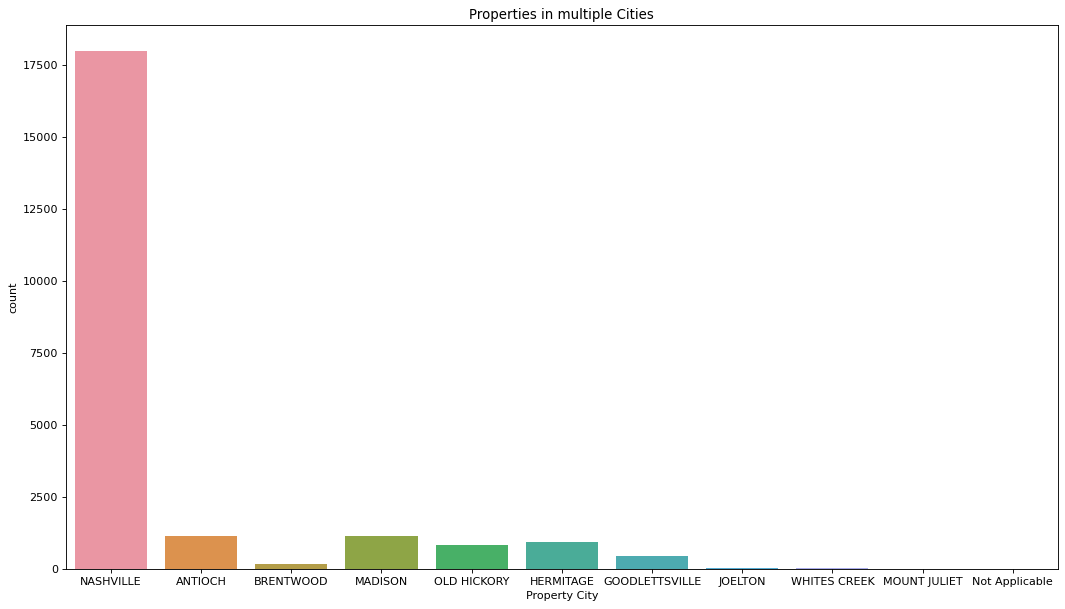

In [28]:
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)
sns.countplot(x = 'Property City',data = sales_data)

plt.title('Properties in multiple Cities')

In [29]:
sales_data['Property City'].value_counts()

NASHVILLE         17978
MADISON            1146
ANTIOCH            1124
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           158
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Not Applicable        2
Name: Property City, dtype: int64

Text(0.5, 1.0, 'Year wise Sales')

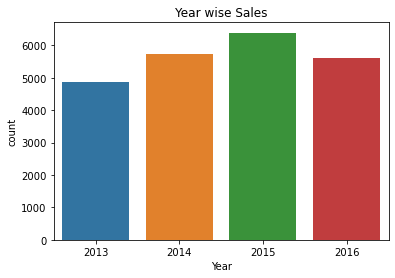

In [30]:

#fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))
sns.countplot(x='Year', data=sales_data)
plt.title('Year wise Sales')

In [31]:
sales_data['Year'].value_counts()

2015    6389
2014    5727
2016    5621
2013    4873
Name: Year, dtype: int64

Text(0.5, 1.0, 'Month-wise Sales')

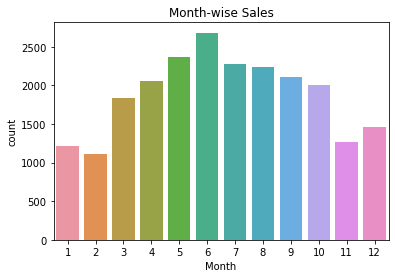

In [37]:
sns.countplot(x='Month', data=sales_data)
plt.title('Month-wise Sales')

Text(0, 0.5, 'Count')

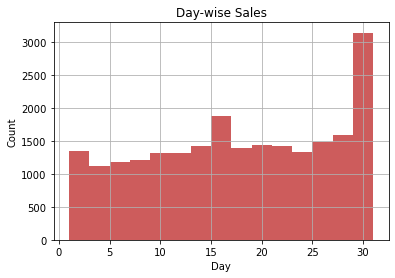

In [36]:
sales_data['Day'].hist(bins = 15,color='indianred')
plt.title('Day-wise Sales')
plt.xlabel("Day")
plt.ylabel("Count")

Text(0.5, 1.0, 'Sale Price Compared To Value Distribution')

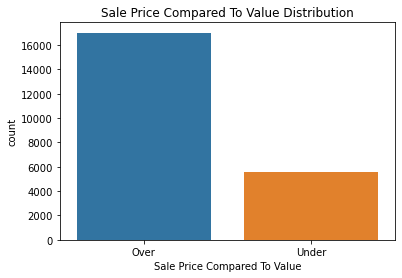

In [40]:
sns.countplot(x='Sale Price Compared To Value', data=sales_data)
plt.title('Sale Price Compared To Value Distribution')

In [41]:
sales_data['Sale Price Compared To Value'].value_counts()

Over     17018
Under     5592
Name: Sale Price Compared To Value, dtype: int64

### Removing Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

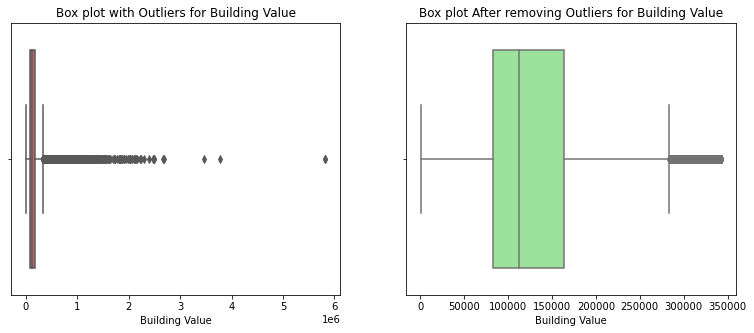

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [42]:
#Box plots--------------------------------------------------------------------------------
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(13,5))
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Building Value',data=sales_data,color="indianred",ax = axis1).set_title('Box plot with Outliers for Building Value')
plt.show

## Removing Ouliers--------------------------------------------------------------------------------

Q1 = sales_data['Building Value'].quantile(0.25)
Q3 = sales_data['Building Value'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (sales_data['Building Value'] < lower_lim)
outliers_up = (sales_data['Building Value'] > upper_lim)
len(sales_data['Building Value'] - (len(sales_data['Building Value'][outliers_low] 
                                             + len(sales_data['Building Value'][outliers_up]))))
sales_data['Building Value'][(outliers_low | outliers_up)]
sales_data['Building Value'][~(outliers_low | outliers_up)]
sales_data = sales_data[~(outliers_low | outliers_up)]

#Box plots--------------------------------------------------------------------------------

fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Building Value',data=sales_data,color="lightgreen",ax = axis2).set_title('Box plot After removing Outliers for Building Value')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

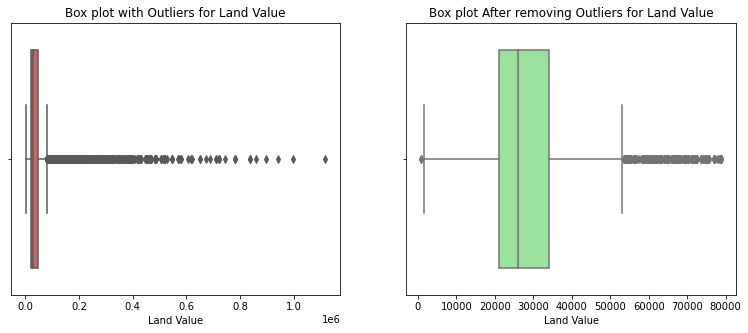

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [43]:
#Box plots--------------------------------------------------------------------------------
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(13,5))
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Land Value',data=sales_data,color="indianred",ax = axis1).set_title('Box plot with Outliers for Land Value')
plt.show

## Removing Ouliers--------------------------------------------------------------------------------
Q1 = sales_data['Land Value'].quantile(0.25)
Q3 = sales_data['Land Value'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (sales_data['Land Value'] < lower_lim)
outliers_up = (sales_data['Land Value'] > upper_lim)
len(sales_data['Land Value'] - (len(sales_data['Land Value'][outliers_low] 
                                             + len(sales_data['Land Value'][outliers_up]))))
sales_data['Land Value'][(outliers_low | outliers_up)]
sales_data['Land Value'][~(outliers_low | outliers_up)]
sales_data = sales_data[~(outliers_low | outliers_up)]

#Box plots--------------------------------------------------------------------------------

fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Land Value',data=sales_data,color="lightgreen",ax = axis2).set_title('Box plot After removing Outliers for Land Value')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

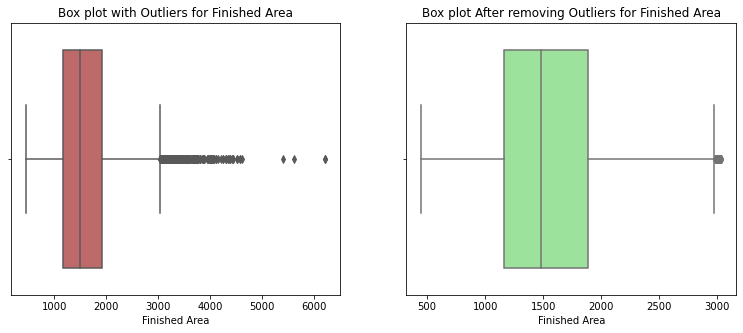

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [44]:
#Box plots--------------------------------------------------------------------------------
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(13,5))
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Finished Area',data=sales_data,color="indianred",ax = axis1).set_title('Box plot with Outliers for Finished Area')
plt.show

## Removing Ouliers--------------------------------------------------------------------------------

Q1 = sales_data['Finished Area'].quantile(0.25)
Q3 = sales_data['Finished Area'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (sales_data['Finished Area'] < lower_lim)
outliers_up = (sales_data['Finished Area'] > upper_lim)
len(sales_data['Finished Area'] - (len(sales_data['Finished Area'][outliers_low] 
                                             + len(sales_data['Finished Area'][outliers_up]))))
sales_data['Finished Area'][(outliers_low | outliers_up)]
sales_data['Finished Area'][~(outliers_low | outliers_up)]
sales_data = sales_data[~(outliers_low | outliers_up)]


#Box plots--------------------------------------------------------------------------------

fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Finished Area',data=sales_data,color="lightgreen",ax = axis2).set_title('Box plot After removing Outliers for Finished Area')
plt.show

### Feature Engineering

In [45]:
X = sales_data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
y = X['Sale Price Compared To Value']

In [46]:

X = X.drop(['Sale Price Compared To Value'],axis = 1)

In [49]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 10 feature by rfe:',X.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['Property Address', 'Sale Date', 'Legal Reference', 'Acreage',
       'Neighborhood', 'Land Value', 'Building Value', 'Finished Area',
       'Year Built', 'Day'],
      dtype='object')


In [50]:
features=list(X.columns[rfe.support_])

In [51]:
x = X[features]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

### Decision Tree Classifier

In [52]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train,y_train)
y_train_pred = dt_classifier.predict(x_train)
y_predict = dt_classifier.predict(x_test)
dt_classifier.score(x_test,y_test)

0.6946564885496184

In [53]:
dt_classifier = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=8)
dt_classifier.fit(x_train,y_train)
y_train_pred = dt_classifier.predict(x_train)
y_predict = dt_classifier.predict(x_test)
dt_classifier.score(x_test,y_test)

0.7762771579565473

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2592
           1       0.57      0.27      0.36       814

    accuracy                           0.78      3406
   macro avg       0.69      0.60      0.61      3406
weighted avg       0.75      0.78      0.74      3406

[[2428  164]
 [ 598  216]]


<AxesSubplot:>

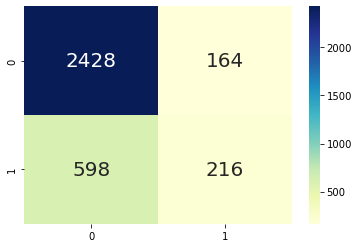

In [54]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_predict)
print(cmm)

## Heat Map to depict the Confusion Matrix
sns.heatmap(cmm,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws= {"size":20})


Text(0.5, 1.0, 'Feature Importance for Decision Tree')

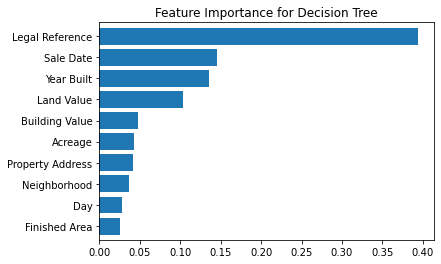

In [67]:
pd.Series(dt_classifier.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance for Decision Tree')

### Random Forest

In [56]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train,y_train)
y_train_pred = rf_classifier.predict(x_train)
y_predict = rf_classifier.predict(x_test)
rf_classifier.score(x_test,y_test)

0.7827363476218439

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2592
           1       0.59      0.30      0.40       814

    accuracy                           0.78      3406
   macro avg       0.70      0.62      0.63      3406
weighted avg       0.76      0.78      0.76      3406

[[2418  174]
 [ 566  248]]


<AxesSubplot:>

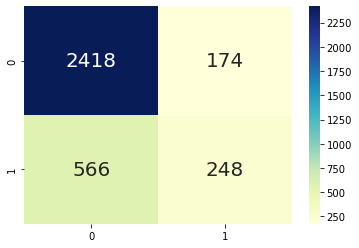

In [57]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_predict)
print(cmm)

## Heat Map to depict the Confusion Matrix
sns.heatmap(cmm,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws= {"size":20})



Text(0.5, 1.0, 'Feature Importance for Random Forest')

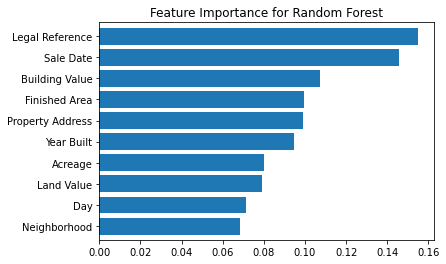

In [58]:
pd.Series(rf_classifier.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance for Random Forest')

### Gradient Boost

In [59]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [60]:

gb_classifier = GradientBoostingClassifier(n_estimators=150, max_depth = 21,max_leaf_nodes=8,min_samples_leaf=2)
gb_classifier.fit(x_train,y_train)
y_train_pred = gb_classifier.predict(x_train)
y_predict = gb_classifier.predict(x_test)
gb_classifier.score(x_test,y_test)

0.7865531415149736

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2592
           1       0.63      0.26      0.37       814

    accuracy                           0.79      3406
   macro avg       0.72      0.61      0.62      3406
weighted avg       0.76      0.79      0.75      3406

[[2467  125]
 [ 602  212]]


<AxesSubplot:>

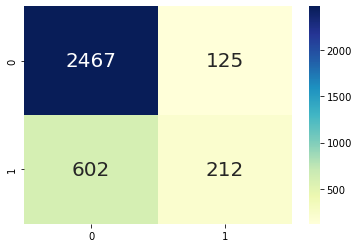

In [61]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_predict)
print(cmm)

## Heat Map to depict the Confusion Matrix
sns.heatmap(cmm,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws= {"size":20})




Text(0.5, 1.0, 'Feature Importance for Gradient Boost')

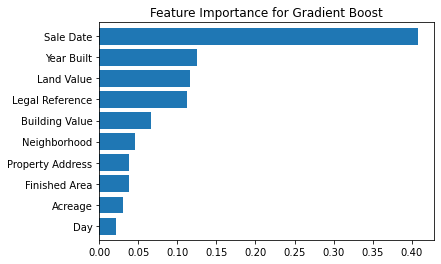

In [62]:
pd.Series(gb_classifier.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance for Gradient Boost')